# AI - CA0

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
bank = pd.read_csv("bank_term_deposit.csv")

In [38]:
bank.describe()

,age,balance,duration,campaign,pdays
count,3984.000000,4164.000000,4388.000000,4521.000000,4521.000000
mean,41.617470,1136.750240,264.724020,2.793630,39.766645
std,10.696378,2726.204918,261.057119,3.109807,100.121124
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000
25%,32.000000,58.000000,104.000000,1.000000,-1.000000
50%,40.000000,316.000000,185.500000,2.000000,-1.000000
75%,49.000000,997.000000,331.000000,3.000000,-1.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000


In [39]:
bank.tail()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
4516,33.0,services,married,secondary,-333.0,yes,no,329.0,5,-1,unknown,no
4517,57.0,self-employed,married,tertiary,-3313.0,yes,yes,153.0,1,-1,unknown,no
4518,57.0,technician,married,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,married,secondary,1137.0,no,no,129.0,4,211,other,no
4520,44.0,entrepreneur,single,tertiary,1136.0,yes,yes,345.0,2,249,other,no


In [40]:
bank.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,married,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,married,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,single,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,married,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,married,secondary,NaN,yes,no,226.0,1,-1,unknown,no


In [41]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4401 non-null   object 
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 424.0+ KB


In [42]:
transform = {
    'divorced' : 0,
    'single' : 1,
    'married' : 2
}
bank_changed = bank.replace(transform)
bank_changed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4401 non-null   float64
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 424.0+ KB


In [43]:
bank.isna().sum()

age          537
job            0
marital      120
education      0
balance      357
housing      219
loan           0
duration     133
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

In [44]:
from pandas.api.types import is_numeric_dtype
for i in bank.columns[bank.isnull().any(axis=0)]:
    if is_numeric_dtype(bank[i]):
        bank[i].fillna(bank[i].mean(), inplace=True)
    elif i != 'y':
        bank[i].fillna(bank[i].mode()[0], inplace=True)
bank.isna().sum()

age            0
job            0
marital        0
education      0
balance        0
housing        0
loan           0
duration       0
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

In [45]:
nan_bank = bank[bank['y'].isnull()]
nan_bank

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
34,49.00000,technician,married,tertiary,1235.0,no,no,354.00000,3,-1,unknown,NaN
38,33.00000,management,married,secondary,3935.0,yes,no,765.00000,1,342,failure,NaN
54,41.61747,blue-collar,married,secondary,2231.0,yes,no,272.00000,3,-1,unknown,NaN
65,51.00000,blue-collar,divorced,secondary,23.0,yes,no,134.00000,1,170,failure,NaN
89,41.61747,blue-collar,married,secondary,1831.0,yes,no,203.00000,2,-1,unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4470,31.00000,technician,single,tertiary,1166.0,yes,no,207.00000,1,-1,unknown,NaN
4471,59.00000,management,married,unknown,3534.0,no,no,216.00000,4,-1,unknown,NaN
4473,33.00000,technician,married,secondary,479.0,yes,no,137.00000,1,272,failure,NaN
4477,32.00000,management,single,tertiary,577.0,no,no,101.00000,2,-1,unknown,NaN


In [46]:
bank = bank[bank['y'].notna()]
bank

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.00000,unemployed,married,primary,1787.00000,no,no,79.00000,1,-1,unknown,no
1,33.00000,services,married,secondary,4789.00000,yes,yes,264.72402,1,339,failure,no
2,41.61747,management,single,tertiary,135.00000,yes,no,185.00000,1,330,failure,no
3,30.00000,management,married,tertiary,1476.00000,yes,yes,199.00000,4,-1,unknown,no
4,59.00000,blue-collar,married,secondary,1136.75024,yes,no,226.00000,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.00000,services,married,secondary,-333.00000,yes,no,329.00000,5,-1,unknown,no
4517,57.00000,self-employed,married,tertiary,-3313.00000,yes,yes,153.00000,1,-1,unknown,no
4518,57.00000,technician,married,secondary,295.00000,no,no,151.00000,11,-1,unknown,no
4519,28.00000,blue-collar,married,secondary,1137.00000,no,no,129.00000,4,211,other,no


In [47]:
bank['housing'].value_counts()

yes    2389
no     1698
Name: housing, dtype: int64

In [48]:
bank['y'].value_counts()

no     3623
yes     464
Name: y, dtype: int64

In [49]:
bank[(bank['age'] > 35) & (bank['marital'] == 'single') & (bank['poutcome'] == 'success')].shape[0]

14

In [50]:
import time
t0 = time.time()
mean = bank[bank['education'] == 'secondary']['balance'].mean()
t1 = time.time()
print('Calculated mean = {0} in {1} seconds'.format(mean, t1 - t0))

Calculated mean = 950.701723798089 in 0.001483917236328125 seconds


In [51]:
new_bank = bank[bank['education'] == 'secondary']
t0 = time.time()
balance_sum = 0
count = 0
for index, row in new_bank.iterrows():
    balance_sum += row['balance']
    count += 1
t1 = time.time()
print('Calculated mean = {0} in {1} seconds'.format(balance_sum / count, t1 - t0))

Calculated mean = 950.7017237980879 in 0.08100676536560059 seconds


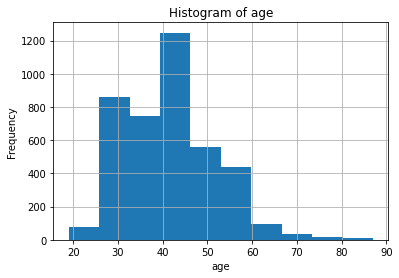

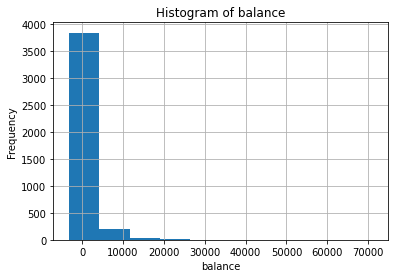

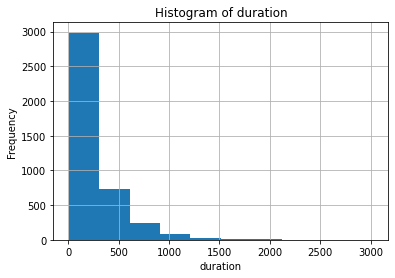

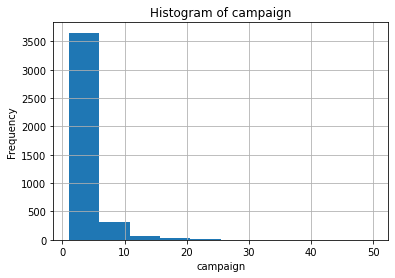

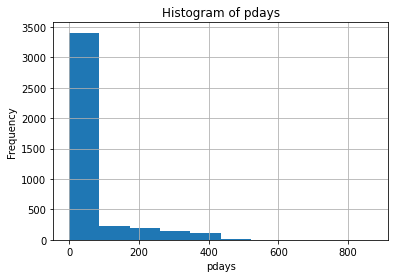

In [52]:
for column in bank:
    if is_numeric_dtype(bank[column]):
        plt.figure()
        plt.title('Histogram of {}'.format(column))
        plt.xlabel(column)
        plt.ylabel('Frequency')
        bank[column].hist()

In [53]:
normalized_bank = bank.copy()
for column in normalized_bank:
    if is_numeric_dtype(normalized_bank[column]):
        normalized_bank[column] = (bank[column] - bank[column].mean())/bank[column].std()

bank = normalized_bank
bank

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,-1.154366,unemployed,married,primary,0.255388,no,no,-0.724620,-0.573012,-0.404051,unknown,no
1,-0.856422,services,married,secondary,1.406374,yes,yes,-0.005131,-0.573012,3.031432,failure,no
2,-0.000582,management,single,tertiary,-0.378000,yes,no,-0.313979,-0.573012,2.940492,failure,no
3,-1.154366,management,married,tertiary,0.136148,yes,yes,-0.259744,0.380660,-0.404051,unknown,no
4,1.725758,blue-collar,married,secondary,0.006078,yes,no,-0.155147,-0.573012,-0.404051,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.856422,services,married,secondary,-0.557434,yes,no,0.243872,0.698550,-0.404051,unknown,no
4517,1.527129,self-employed,married,tertiary,-1.699986,yes,yes,-0.437946,-0.573012,-0.404051,unknown,no
4518,1.527129,technician,married,secondary,-0.316655,no,no,-0.445694,2.605894,-0.404051,unknown,no
4519,-1.352996,blue-collar,married,secondary,0.006173,no,no,-0.530922,0.380660,1.738074,other,no


In [54]:
yes = bank[bank["y"] == "yes"]
no = bank[bank["y"] == "no"]

In [55]:
from scipy.stats import norm

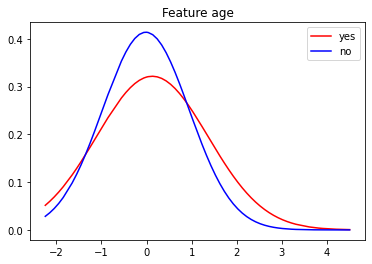

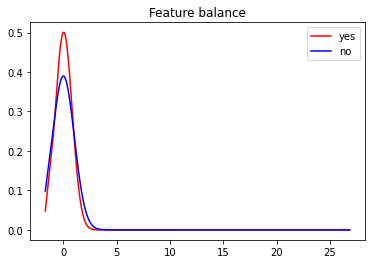

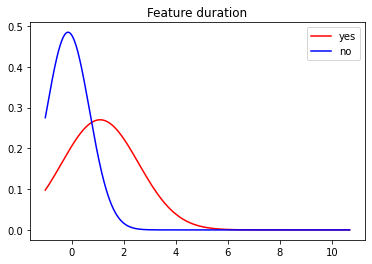

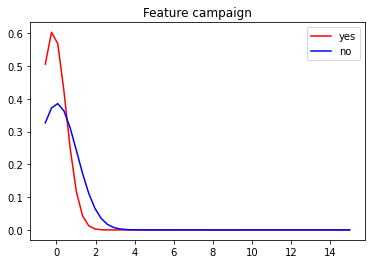

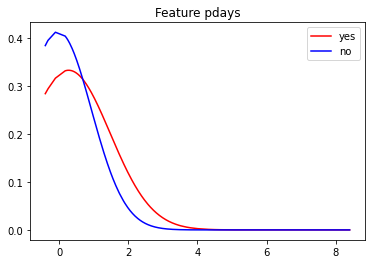

In [56]:
details = {}
for feature in bank:
    if is_numeric_dtype(bank[feature]):
        feature_yes_mean = yes[feature].mean()
        feature_yes_std = yes[feature].std()
        feature_no_mean = no[feature].mean()
        feature_no_std = no[feature].std()
        yes_pdfs = norm(feature_yes_mean, feature_yes_std).pdf(bank[feature].sort_values())
        no_pdfs = norm(feature_no_mean, feature_no_std).pdf(bank[feature].sort_values())
        details[feature] = [yes_pdfs, no_pdfs]
        plt.figure()

        plt.plot(bank[feature].sort_values(), yes_pdfs, color = 'r', label = 'yes')
        plt.plot(bank[feature].sort_values(), no_pdfs, color = 'b', label = 'no')
        plt.legend()
        plt.title("Feature {}".format(feature))
        plt.show()

In [57]:
from shapely.geometry import LineString
yes_string = LineString(np.column_stack((bank["duration"].sort_values(), details["duration"][0])))
no_string = LineString(np.column_stack((bank["duration"].sort_values(), details["duration"][1])))
intersection = yes_string.intersection(no_string)

feature, p = intersection.xy
feature[0]

0.7681346965513338

In [58]:
normalized_bank = nan_bank.copy()
normalized_bank["duration"] = (nan_bank["duration"] - nan_bank["duration"].mean())/nan_bank["duration"].std()

normalized_bank.loc[normalized_bank.duration > feature[0], 'y'] = "yes"
normalized_bank.loc[normalized_bank.duration <= feature[0], 'y'] = "no"
normalized_bank['y'].value_counts()

no     375
yes     59
Name: y, dtype: int64

In [59]:
normalized_bank.to_csv("predicted_results.csv")